<a href="https://colab.research.google.com/github/vishaleswari1813-cpu/CSA0710-CN/blob/main/ExplainableXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile, os

for file in uploaded.keys():
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall("/content/data")

os.listdir("/content/data")

Saving archive (3).zip to archive (3).zip
Saving archive (2).zip to archive (2).zip
Saving archive (1).zip to archive (1).zip
Saving archive.zip to archive (4).zip


['brand_sentiment_news.csv',
 'stroke_risk_dataset.csv',
 'XAI_Drilling_Dataset.csv',
 'AI_Impact_on_Jobs_2030.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/stroke_risk_dataset.csv")
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/stroke_risk_dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (70000, 18)


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
df.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [ ]:
# Target column for classification
target = "At Risk (Binary)"

# Fill missing numeric values
df = df.fillna(df.median(numeric_only=True))

# Convert categorical → numeric
df = pd.get_dummies(df, drop_first=True)

# Features & label
X = df.drop(target, axis=1)
y = df[target]

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

X shape: (70000, 17)
y distribution:
 At Risk (Binary)
1    45444
0    24556
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4911
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4911
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



In [ ]:
!pip install shap

In [21]:
print("=== Model Comparison ===")
print("Random Forest Accuracy:", rf_acc)
print("Logistic Regression Accuracy:", lr_acc)

=== Model Comparison ===
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 1.0


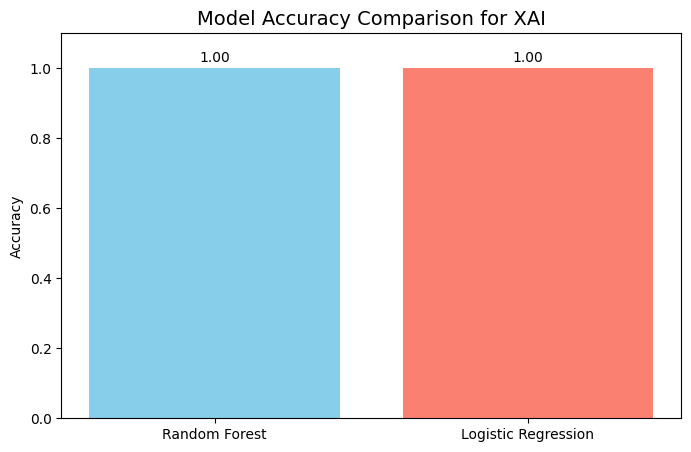

In [22]:
# Import libraries
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Random Forest', 'Logistic Regression']
accuracies = [1.0, 1.0]

# Plotting the bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

# Adding text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Titles and labels
plt.title('Model Accuracy Comparison for XAI', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # slightly above 1 to fit text
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Load brand sentiment news dataset
df = pd.read_csv("/content/data/brand_sentiment_news.csv")

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (995, 8)


,source,brand,text,sentiment_label,sentiment_score,published_at,collected_at,language
0,google_news,Apple,Apple’s stock can climb 35% this year — if the...,positive,0.3400,"Mon, 12 Jan 2026 02:42:00 GMT",2026-01-13T06:58:42.357066,en
1,google_news,Apple,Apple: You (Still) Don’t Understand the Vision...,positive,0.2500,"Mon, 12 Jan 2026 11:00:00 GMT",2026-01-13T06:58:42.357430,en
2,google_news,Apple,Gemini will power Apple's Siri - Axios,neutral,0.0000,"Tue, 13 Jan 2026 03:10:33 GMT",2026-01-13T06:58:42.357547,en
3,google_news,Apple,Former Apple Daily staff plead for lighter sen...,positive,0.4926,"Tue, 13 Jan 2026 06:03:42 GMT",2026-01-13T06:58:42.357815,en
4,google_news,Apple,Global Smartphone Shipments Grew 2% YoY in 202...,neutral,0.0000,"Mon, 12 Jan 2026 09:28:22 GMT",2026-01-13T06:58:42.358072,en


In [25]:
# List all columns to identify target
df.columns

Index(['source', 'brand', 'text', 'sentiment_label', 'sentiment_score',
       'published_at', 'collected_at', 'language'],
      dtype='object')

In [29]:
# Load dataset
df = pd.read_csv("/content/data/brand_sentiment_news.csv")

# Show column names
print(df.columns)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert to lowercase (optional, makes referencing easier)
df.columns = df.columns.str.lower()

print(df.columns)

Index(['source', 'brand', 'text', 'sentiment_label', 'sentiment_score',
       'published_at', 'collected_at', 'language'],
      dtype='object')
Index(['source', 'brand', 'text', 'sentiment_label', 'sentiment_score',
       'published_at', 'collected_at', 'language'],
      dtype='object')


In [30]:
# Fill missing values
df['text'] = df['text'].fillna('')
df['brand'] = df['brand'].fillna('unknown')
df['language'] = df['language'].fillna('unknown')

# Select only relevant columns
df = df[['text', 'brand', 'language', 'sentiment_label']]

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['brand','language'], drop_first=True)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['text'])

# Combine text features with categorical features
X_other = df.drop(['text','sentiment_label'], axis=1)
X = scipy.sparse.hstack([X_text, X_other])
y = df['sentiment_label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.678391959798995
              precision    recall  f1-score   support

    negative       0.87      0.36      0.51        36
     neutral       0.63      0.91      0.74        92
    positive       0.76      0.54      0.63        71

    accuracy                           0.68       199
   macro avg       0.75      0.60      0.63       199
weighted avg       0.72      0.68      0.66       199



In [34]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.6683417085427136
              precision    recall  f1-score   support

    negative       0.93      0.36      0.52        36
     neutral       0.62      0.87      0.73        92
    positive       0.70      0.56      0.62        71

    accuracy                           0.67       199
   macro avg       0.75      0.60      0.62       199
weighted avg       0.71      0.67      0.65       199



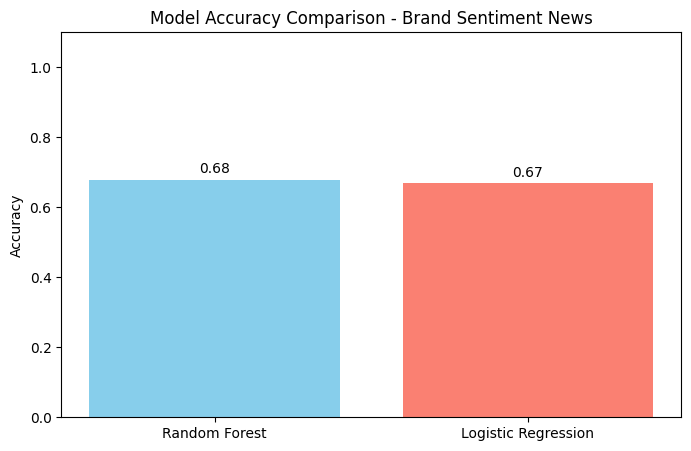

In [35]:
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_acc, lr_acc]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Model Accuracy Comparison - Brand Sentiment News')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.show()

In [36]:
# Load dataset
df = pd.read_csv("/content/data/XAI_Drilling_Dataset.csv")

# Inspect columns
print("Original columns:", df.columns)

# Strip whitespace and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

print("Cleaned columns:", df.columns)

Original columns: Index(['ID', 'Cutting speed vc [m/min]', 'Spindle speed n [1/min]',
       'Feed f [mm/rev]', 'Feed rate vf [mm/min]', 'Power Pc [kW]',
       'Cooling [%]', 'Material', 'Drill Bit Type', 'Process Time [sec]',
       'Main Failure', 'BEF', 'CCF', 'FWF', 'WDF'],
      dtype='object')
Cleaned columns: Index(['id', 'cutting speed vc [m/min]', 'spindle speed n [1/min]',
       'feed f [mm/rev]', 'feed rate vf [mm/min]', 'power pc [kw]',
       'cooling [%]', 'material', 'drill bit type', 'process time [sec]',
       'main failure', 'bef', 'ccf', 'fwf', 'wdf'],
      dtype='object')


In [37]:
target = 'main failure'

# Fill missing numeric values
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != target]
df[categorical_cols] = df[categorical_cols].fillna('unknown')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df.drop(target, axis=1)
y = df[target]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (20000, 16)
Target shape: (20000,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16000, 16)
X_test: (4000, 16)
y_train: (16000,)
y_test: (4000,)


In [39]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [40]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


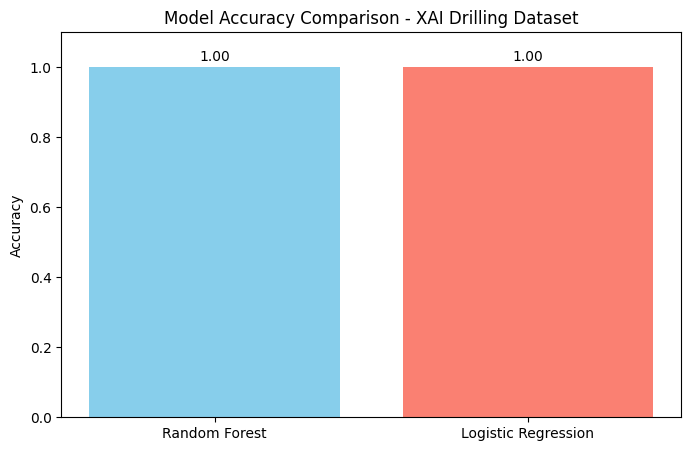

In [41]:
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_acc, lr_acc]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Model Accuracy Comparison - XAI Drilling Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.show()

In [42]:
# Load dataset
df = pd.read_csv("/content/data/AI_Impact_on_Jobs_2030.csv")

# Inspect columns
print("Original columns:", df.columns)

# Strip whitespace and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

print("Cleaned columns:", df.columns)

Original columns: Index(['Job_Title', 'Average_Salary', 'Years_Experience', 'Education_Level',
       'AI_Exposure_Index', 'Tech_Growth_Factor',
       'Automation_Probability_2030', 'Risk_Category', 'Skill_1', 'Skill_2',
       'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8',
       'Skill_9', 'Skill_10'],
      dtype='object')
Cleaned columns: Index(['job_title', 'average_salary', 'years_experience', 'education_level',
       'ai_exposure_index', 'tech_growth_factor',
       'automation_probability_2030', 'risk_category', 'skill_1', 'skill_2',
       'skill_3', 'skill_4', 'skill_5', 'skill_6', 'skill_7', 'skill_8',
       'skill_9', 'skill_10'],
      dtype='object')


In [46]:
import pandas as pd

df = pd.read_csv("/content/data/AI_Impact_on_Jobs_2030.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned columns:", df.columns)

Cleaned columns: Index(['job_title', 'average_salary', 'years_experience', 'education_level',
       'ai_exposure_index', 'tech_growth_factor',
       'automation_probability_2030', 'risk_category', 'skill_1', 'skill_2',
       'skill_3', 'skill_4', 'skill_5', 'skill_6', 'skill_7', 'skill_8',
       'skill_9', 'skill_10'],
      dtype='object')


In [47]:
target = 'risk_category'

# Drop non-informative columns like 'job_title'
if 'job_title' in df.columns:
    df = df.drop('job_title', axis=1)

# Identify categorical columns (exclude target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != target]

# Fill missing values
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna('unknown')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features & target
X = df.drop(target, axis=1)
y = df[target]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3000, 18)
Target shape: (3000,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       148
         Low       1.00      1.00      1.00       148
      Medium       1.00      1.00      1.00       304

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [50]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.895
              precision    recall  f1-score   support

        High       0.89      0.86      0.88       148
         Low       0.91      0.91      0.91       148
      Medium       0.89      0.91      0.90       304

    accuracy                           0.90       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.90      0.89       600



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


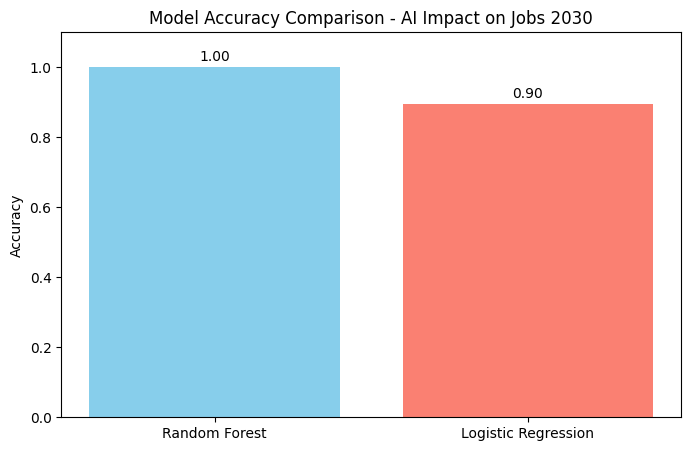

In [51]:
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_acc, lr_acc]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Model Accuracy Comparison - AI Impact on Jobs 2030')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.show()